In [1]:
import pandas as pd

In [2]:
from tqdm.auto import tqdm
tqdm.pandas()

/home/vscode/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_json('wish_queries_with_timestamp.json', lines=True)

In [4]:
df['min_timestamp_datetime'] = pd.to_datetime(df['min_timestamp'], unit='s')

In [5]:
df.set_index('min_timestamp_datetime', inplace=True)

In [6]:
df = df.sort_index()

In [7]:
df

,query,min_timestamp,max_timestamp,min_dt,max_dt,cnt,gmv
min_timestamp_datetime,,,,,,,
2019-12-31 08:00:00,posters elefantes,1577779200,1655259026,2020-01-01,2022-06-15,145,0.000000e+00
2019-12-31 08:00:00,ben 10 toys,1577779200,1669795184,2020-01-01,2022-11-30,26952,2.796466e+03
2019-12-31 08:00:00,cover iphone 11 pro max,1577779200,1669794442,2020-01-01,2022-11-30,222735,1.558650e+04
2019-12-31 08:00:00,king and queen,1577779200,1669794566,2020-01-01,2022-11-30,717750,1.311209e+05
2019-12-31 08:00:00,electric bike,1577779200,1669795158,2020-01-01,2022-11-30,4111706,1.056199e+06
...,...,...,...,...,...,...,...
2022-11-30 07:59:56,moxa cone needld,1669795196,1669795196,2022-11-30,2022-11-30,1,0.000000e+00
2022-11-30 07:59:57,scheerapparaat heren mesjes philips 1000,1669795197,1669795198,2022-11-30,2022-11-30,2,0.000000e+00
2022-11-30 07:59:58,golden diamond krone handyhülle,1669795198,1669795198,2022-11-30,2022-11-30,1,0.000000e+00


In [8]:
from dateutil.relativedelta import relativedelta
import numpy as np

In [9]:
df_roll_s_count = df.rolling(window='1S')['query'].count()

<AxesSubplot: xlabel='min_timestamp_datetime'>

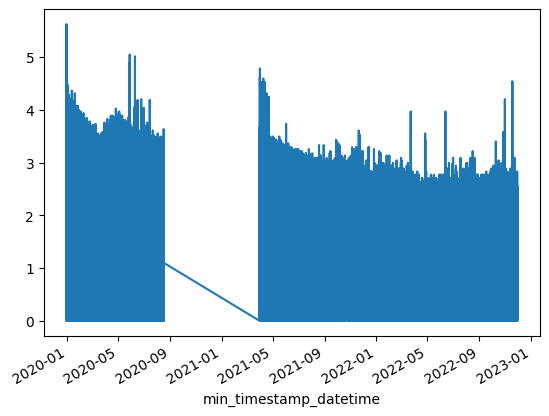

In [10]:
df_roll_s_count.apply(lambda x: np.log(x)).plot()

In [11]:
df_roll_s_count.mean(), df_roll_s_count.median()

(7.1596399716499715, 5.0)

In [12]:
df_roll_s_count_gmvnonzero = df[df.gmv > 0].rolling(window='1S')['query'].count()
df_roll_s_count_cntgt100 = df[df.cnt > 100].rolling(window='1S')['query'].count()

<AxesSubplot: xlabel='min_timestamp_datetime'>

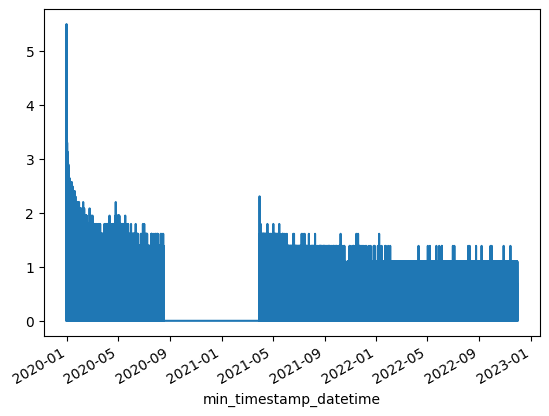

In [13]:
df_roll_s_count_gmvnonzero.apply(lambda x: np.log(x)).plot()

<AxesSubplot: xlabel='min_timestamp_datetime'>

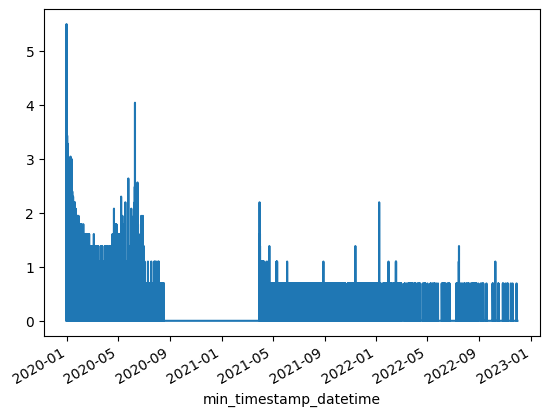

In [14]:
df_roll_s_count_cntgt100.apply(lambda x: np.log(x)).plot()

In [15]:
df_roll_s_count_gmvnonzero.mean(), df_roll_s_count_gmvnonzero.median()

(2.059954738078277, 1.0)

In [16]:
df_roll_s_count_cntgt100.mean(), df_roll_s_count_cntgt100.median()

(3.53423154239845, 2.0)

In [17]:
np.exp(6) / (1/0.14) * .316 * 9000, np.exp(2) / (1/0.14) * .316 * 9000

(160629.20841706742, 2942.026576350228)

In [18]:
1 / .14

7.142857142857142

In [19]:
df.gmv.sum() / 3

600390043.5127572

In [20]:
160629 / 600390043

0.00026754107912479156

In [22]:
df.cnt.sum() / 3

7165963371.0

In [23]:
df.cnt.sum() / len(df)

40.631052944622944

<AxesSubplot: ylabel='Frequency'>

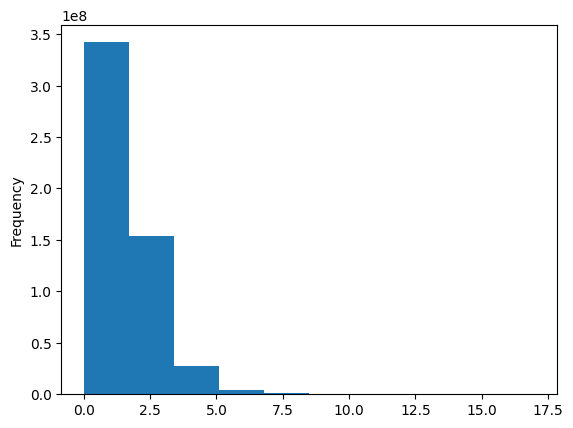

In [25]:
df.cnt.apply(np.log).plot.hist()

<AxesSubplot: ylabel='Frequency'>

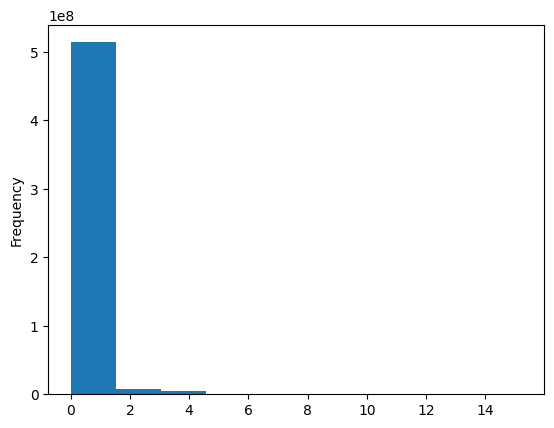

In [27]:
df.gmv.apply(lambda x: np.log(x + 1)).plot.hist()

In [33]:
df_roll_s_count_max = df_roll_s_count.groupby('min_timestamp_datetime').max()

In [34]:
df_roll_s_count_max.max(), df_roll_s_count_max.min(), df_roll_s_count_max.mean(), df_roll_s_count_max.median()

(278.0, 1.0, 7.629152423227022, 5.0)

<AxesSubplot: xlabel='min_timestamp_datetime'>

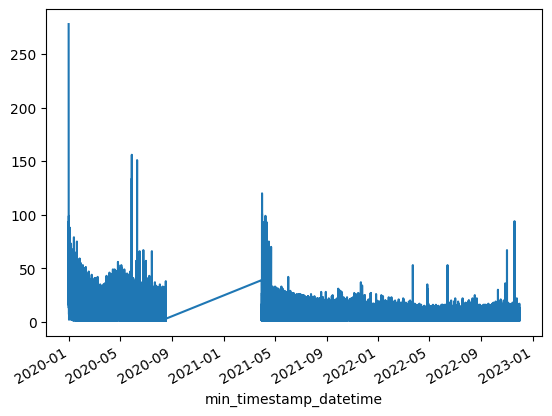

In [36]:
df_roll_s_count_max.plot.line()

In [38]:
(df.gmv == 0).mean()

0.9657667794367795

In [39]:
(df.cnt <= 100).mean()

0.9824899187299188

In [40]:
((df.cnt <= 100) & (df.gmv == 0)).mean()

0.9572420846720847

In [42]:
df[df.gmv == 0].sort_values('cnt', ascending=False)

,query,min_timestamp,max_timestamp,min_dt,max_dt,cnt,gmv
min_timestamp_datetime,,,,,,,
2020-04-27 07:03:20,5c7757f13a8f622f8886eead,1587971000,1645165949,2020-04-28,2022-02-18,1108629,0.0
2021-04-30 03:09:30,5d5163cae5ff890d638497d3,1619752170,1623472593,2021-04-30,2021-06-12,850413,0.0
2021-04-03 01:50:31,5fe064a01d4e4b488941bcdb,1617414631,1635149473,2021-04-03,2021-10-26,651195,0.0
2020-07-02 22:16:35,5eec31a996dd3b147cb89d4c,1593728195,1623389393,2020-07-03,2021-06-11,639971,0.0
2020-06-12 12:24:26,5dd6937fa27412a9251f1188,1591964666,1623439751,2020-06-13,2021-06-12,551774,0.0
...,...,...,...,...,...,...,...
2022-01-26 15:30:51,baytrry pressure washer,1643211051,1643211051,2022-01-27,2022-01-27,1,0.0
2020-02-03 21:20:57,print pavao,1580764857,1580764857,2020-02-04,2020-02-04,1,0.0
2021-04-18 08:05:45,mens pants fansgi,1618733145,1618733145,2021-04-19,2021-04-19,1,0.0
